# Logistic Regression Eğitimi



## Lojistik Regresyon Nedir?

Lojistik regresyon, istatistik ve makine öğreniminde, bir veya daha fazla bağımsız değişken kullanarak bağımlı değişkenin olasılığını tahmin etmek için kullanılan bir regresyon analizidir. Genellikle, bağımlı değişken ikili (binary) bir sonuçtur: evet/hayır, 0/1, başarılı/başarısız gibi.

Lojistik regresyon, bağımsız değişkenlerin doğrusal bir kombinasyonunu kullanarak logit (log-odds) fonksiyonunu modelleyerek çalışır. Logit fonksiyonu, bağımlı değişkenin olasılıklarını logit dönüşümü ile tahmin eder. Bu dönüşüm, tahmin edilen olasılıkları 0 ile 1 arasında sınırlar.

## Matematiksel Temel

Lojistik regresyon modeli, aşağıdaki formüle dayanır:

$$\text{logit}(p) = \log(\frac{p}{1-p}) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$$

Burada,
- $p$, bağımlı değişkenin 1 olma olasılığıdır.
- $\beta_0$, sabit terim (intercept).
- $\beta_1, \beta_2, ..., \beta_n$, bağımsız değişkenlerin katsayılarıdır.
- $X_1, X_2, ..., $X_n$, bağımsız değişkenlerdir.

Bu logit fonksiyonu, aşağıdaki sigmoid fonksiyonu kullanılarak olasılığa dönüştürülür:

$$p = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}$$

## Uygulama

Şimdi, lojistik regresyonu bir veri seti üzerinde uygulayalım ve matplotlib kullanarak çeşitli grafikler çizelim.

In [1]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Örnek veri seti oluşturulması
np.random.seed(0)
X = np.random.randn(1000, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modeli oluşturma ve eğitme
model = LogisticRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Model performansını değerlendirme
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))
print("Doğruluk Skoru: ", accuracy_score(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Karışıklık Matrisi:
 [[105   0]
 [  0  95]]
Doğruluk Skoru:  1.0


### Model Performansı

Yukarıdaki kod, modelin performansını değerlendirir ve sınıflandırma raporu, karışıklık matrisi ve doğruluk skorunu verir. Şimdi, verilerimizi ve modelimizin tahminlerini görselleştirelim.

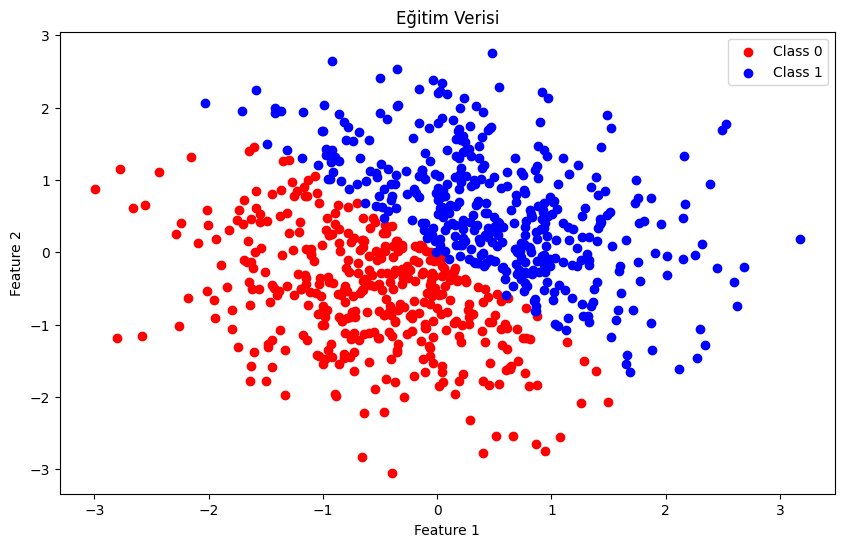

In [2]:
# Eğitim verisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Eğitim Verisi')
plt.legend()
plt.show()

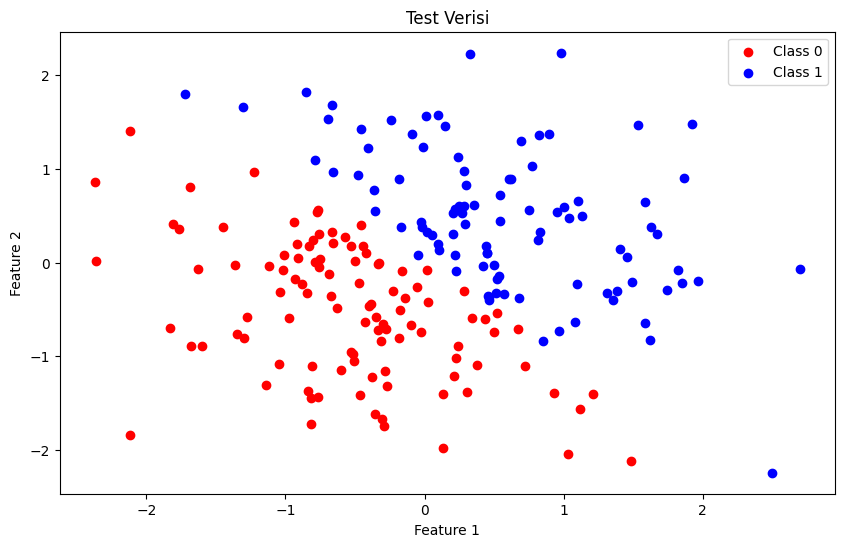

In [3]:
# Test verisinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Verisi')
plt.legend()
plt.show()

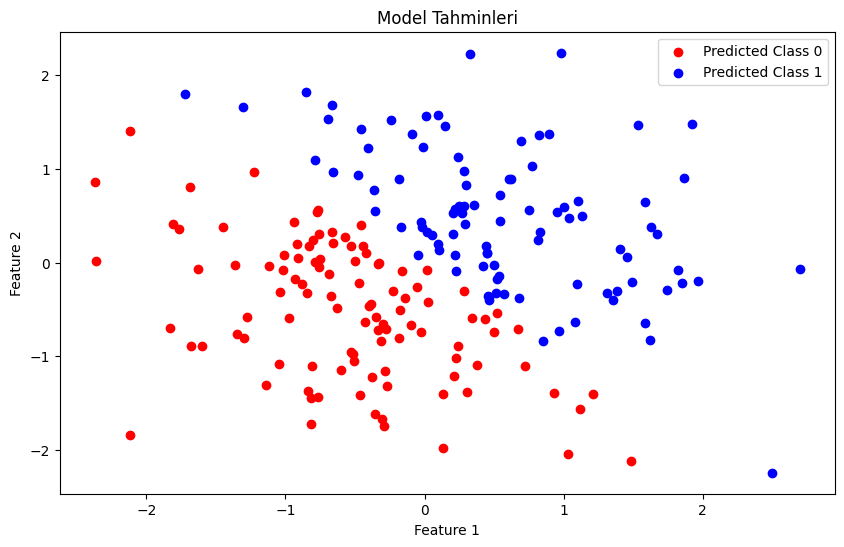

In [4]:
# Model tahminlerinin görselleştirilmesi
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], color='red', label='Predicted Class 0')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], color='blue', label='Predicted Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Model Tahminleri')
plt.legend()
plt.show()